In [51]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import altair as alt
from IPython.display import display
from scipy.interpolate import interp1d

In [4]:
df = pd.read_csv('reviews_wpars_wsents_wbusinfo.csv')

#### Exploration

In [5]:
df.shape

(10954, 27)

In [6]:
# which businesses have the most reviews? 
from collections import Counter

print(Counter(df['business_id']))

Counter({'EQ-TZ2eeD_E0BHuvoaeG5Q': 400, 'Q-prSTdggNlxAEFV88BZOw': 324, 'sdFJSq-EgmtplIwUamRwTQ': 169, 'GBTPC53ZrG1ZBY3DT8Mbcw': 85, 'pSmOH4a3HNNpYM82J5ycLA': 48, 'PY9GRfzr4nTZeINf346QOw': 43, '8uF-bhJFgT4Tn6DTb27viA': 43, 'EtKSTHV5Qx_Q7Aur9o4kQQ': 41, 'vN6v8m4DO45Z4pp8yxxF_w': 38, 'W4ZEKkva9HpAdZG88juwyQ': 36, 'UCMSWPqzXjd7QHq7v8PJjQ': 34, 'SZU9c8V2GuREDN5KgyHFJw': 33, 'M0r9lUn2gLFYgIwIfG8-bQ': 33, 'Dv6RfXLYe1atjgz3Xf4GGw': 31, 'j8JOZvfeHEfUWq3gEz6ABQ': 26, 'oQ5CPRt0R3AzFvcjNOqB1w': 26, 'g04aAvgol7IW8buqSbT4xA': 26, 'uW8L6awmCyjovD9OhWPo7g': 25, '-ujBP1Dw0j1-Ffaz97-LXQ': 25, 'A21srfWbl97OWsCn2lK-0Q': 25, 'e9YiQo_CGJrnjJXBilAEWQ': 25, 'S2Ho8yLxhKAa26pBAm6rxA': 23, '9gObo5ltOMo6UgsaXaHPWA': 23, 'FHNIvNgh3fS7VZQq2Y3dsA': 23, 'jMZ56S8Y1t7cA1Ob-d-qeA': 23, 'd_tRshM-w6S4QxE4VVi8tQ': 23, '2KIDQyTh-HzLxOUEDqtDBg': 23, 'Zi-F-YvyVOK0k5QD7lrLOg': 22, 'EpREWeEpmR8f1qLHzzF0AA': 22, 'AzseSGgDC6bVtMPEYo1CNQ': 22, 'ompDR5sUDpoI6gnTldmneQ': 22, 'ltBBYdNzkeKdCNPDAsxwAA': 21, 'jQBPO3rYkNwIaOdQS5ktgQ': 21

#### Get results

- How do sentiments change over time? 
- How do sentiments per type of business change over time? 

#### Sentiments for a specific business over time

IDs for testing: 
'EQ-TZ2eeD_E0BHuvoaeG5Q': 400, 

'Q-prSTdggNlxAEFV88BZOw': 324, 

'sdFJSq-EgmtplIwUamRwTQ': 169, 

'GBTPC53ZrG1ZBY3DT8Mbcw': 85

In [29]:
df.columns

Index(['Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0', 'review_id', 'user_id',
       'business_id', 'stars', 'useful', 'funny', 'cool', 'text', 'date',
       'category', 'location', 'service', 'quality', 'atmosphere', 'value',
       'overall', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'review_count'],
      dtype='object')

(400, 27)


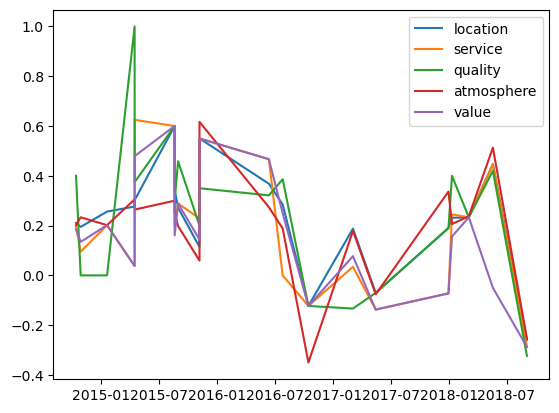

In [ ]:
business_id = 'EQ-TZ2eeD_E0BHuvoaeG5Q'


def get_bus_sentiments_over_time(business_id, df): 

    # retrieve rows for that business
    bus_df = df[df['business_id'] == business_id]
    print(bus_df.shape) # ensure that there are enough rows to plot 

    # MATPLOTLIB CODE - USING ALTAIR FOR EASE OF USE

    bus_df.loc[:, 'date'] = pd.to_datetime(bus_df['date'])
    bus_df = bus_df.sort_values(by='date')

    x = bus_df['date']
    y_location = bus_df['location']
    y_service = bus_df['service']
    y_quality = bus_df['quality']
    y_atmosphere = bus_df['atmosphere']
    y_value = bus_df['value']
    y_overall = bus_df['overall']

    plt.plot(x, y_location, label='location')
    plt.plot(x, y_service, label='service')
    plt.plot(x, y_quality, label='quality')
    plt.plot(x, y_atmosphere, label='atmosphere')
    plt.plot(x, y_value, label='value')
    #plt.plot(x, y_overall, label='overall')
    plt.legend()

    plt.show()

get_bus_sentiments_over_time(business_id, df)

In [37]:
bus_df = df[df['category'] == 'food']
bus_df['category'].head()

0    food
2    food
3    food
4    food
5    food
Name: category, dtype: object

In [53]:
def get_cat_sentiments_over_time_interp(category, df): 

    # retrieve rows for that business
    bus_df = df[df['category'] == category]

    bus_df.loc[:, 'date'] = pd.to_datetime(bus_df['date'])
    bus_df = bus_df.sort_values(by='date')

    topics = ['location', 'service', 'quality', 'atmosphere', 'value', 'overall']

    for t in topics: 
        plt.plot(bus_df[t], label=t)
    plt.legend()

    plt.show()

In [52]:
def get_cat_sentiments_over_time(category, df): 

    # retrieve rows for that business
    bus_df = df[df['category'] == category]

    bus_df.loc[:, 'date'] = pd.to_datetime(bus_df['date'])
    bus_df = bus_df.sort_values(by='date')

    x = bus_df['date']
    y_location = bus_df['location']
    y_service = bus_df['service']
    y_quality = bus_df['quality']
    y_atmosphere = bus_df['atmosphere']
    y_value = bus_df['value']
    y_overall = bus_df['overall']

    plt.plot(x, y_location, label='location')
    plt.plot(x, y_service, label='service')
    plt.plot(x, y_quality, label='quality')
    plt.plot(x, y_atmosphere, label='atmosphere')
    plt.plot(x, y_value, label='value')
    #plt.plot(x, y_overall, label='overall')
    plt.legend()

    plt.show()

for cat in df['category'].unique(): 
    print(cat)
    get_cat_sentiments_over_time_interp(cat, df)

food


NameError: name 'get_cat_sentiments_over_time_interp' is not defined

food


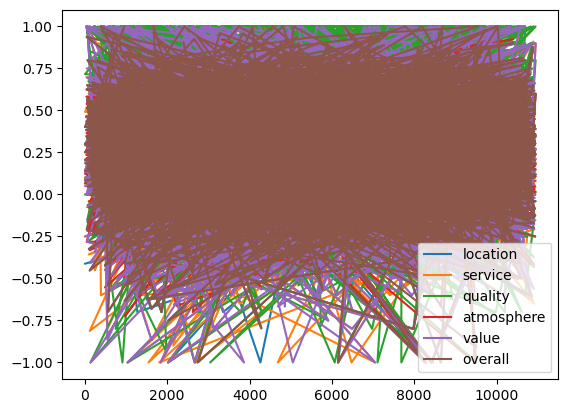

entertainment


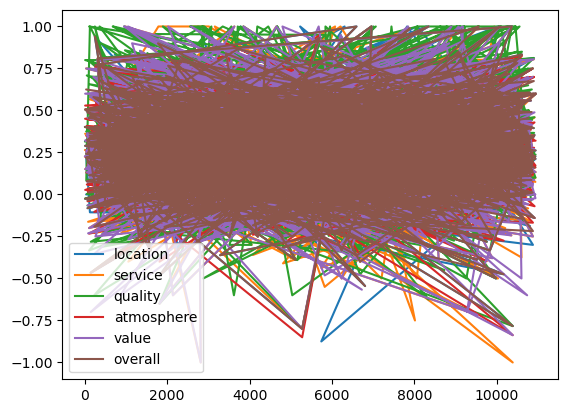

retail


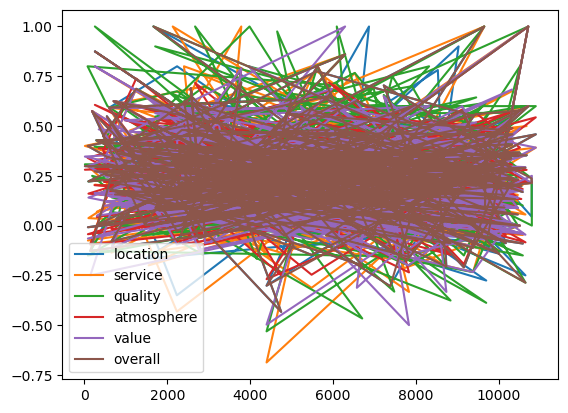

restaurants


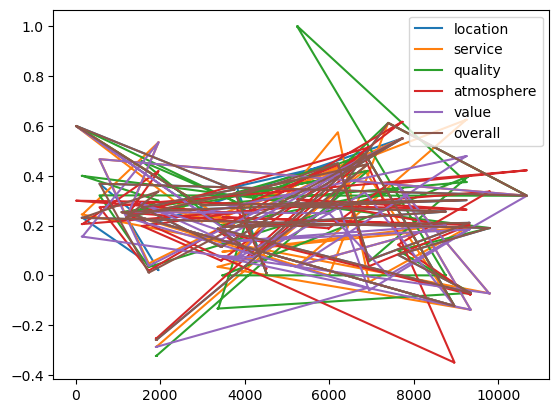

beauty


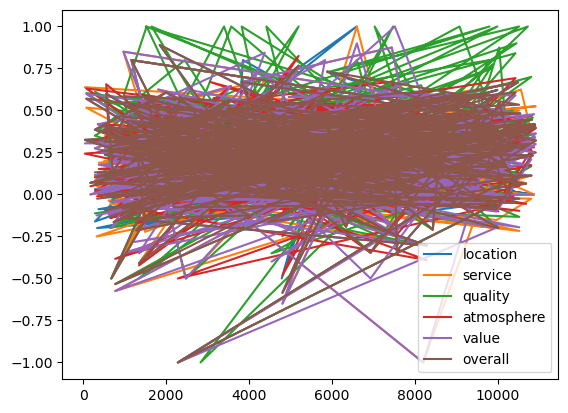

auto


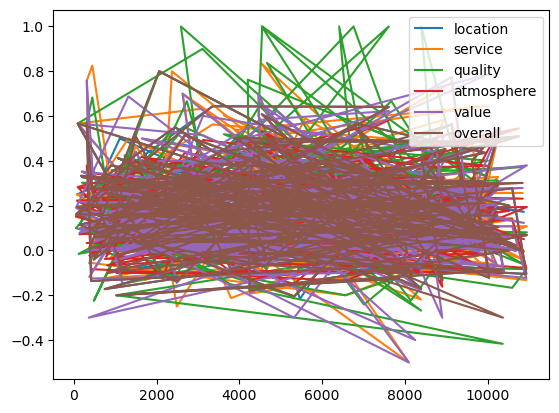

health


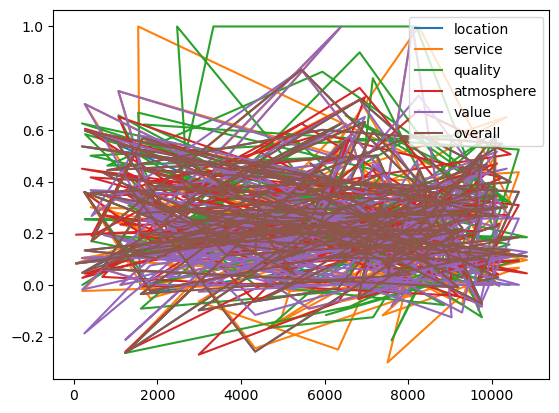

travel


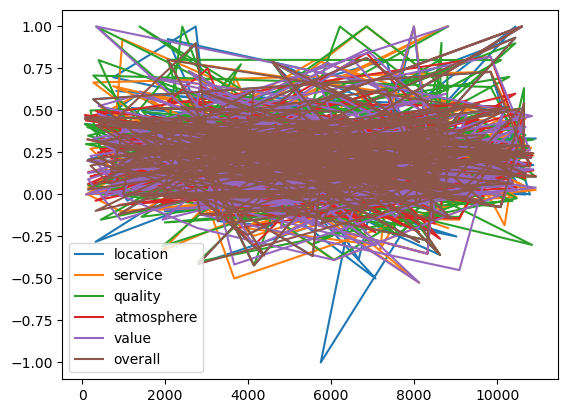

homeservices


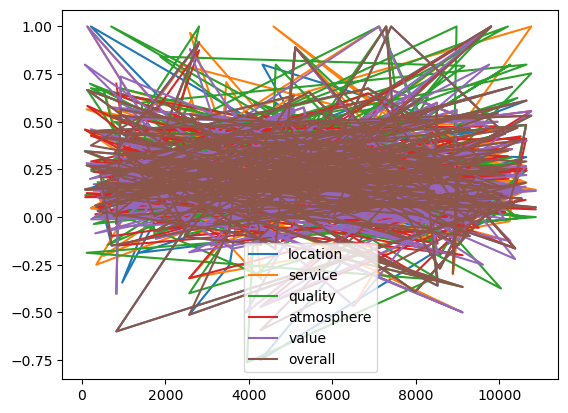

professionalservices


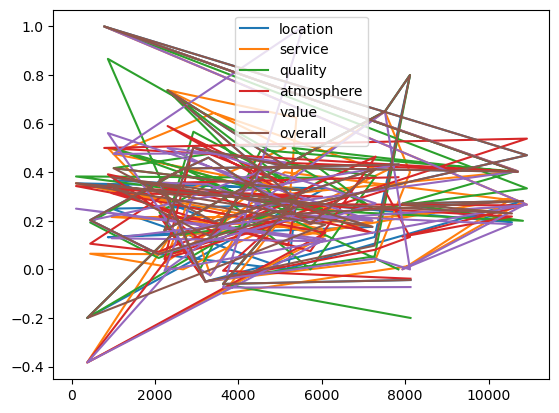

education


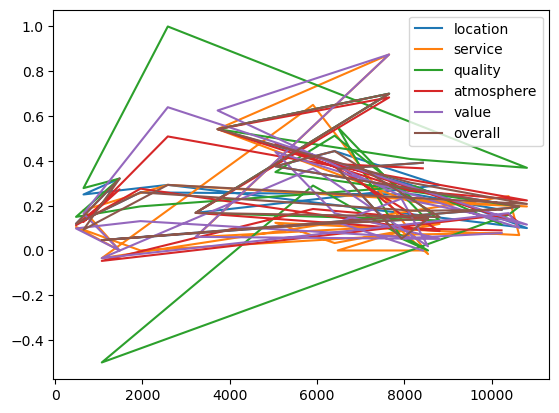

nightlife


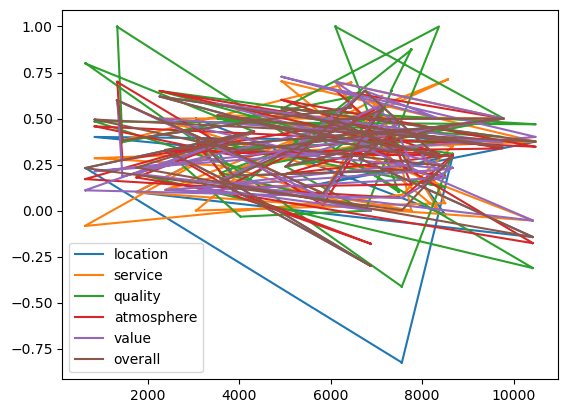

shopping


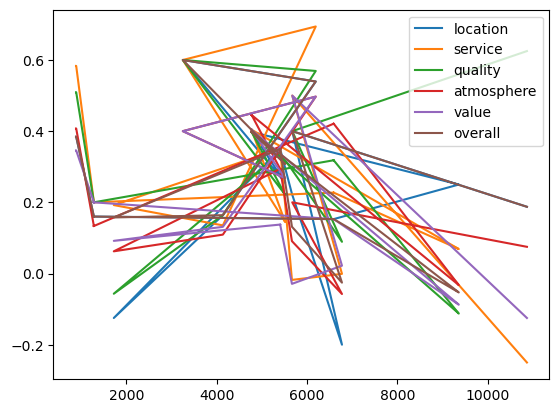

localservices


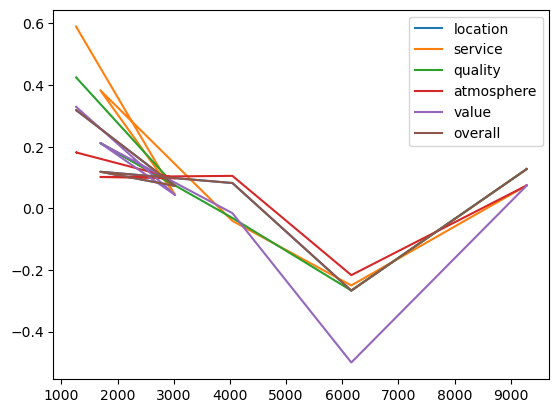

hotelstravel


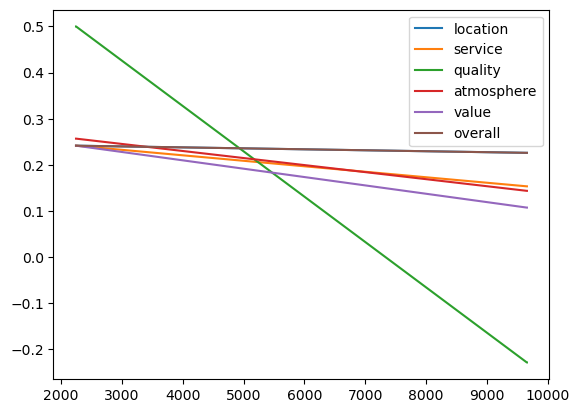

arts


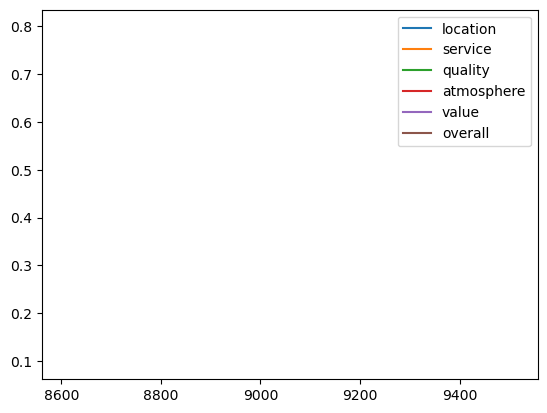

In [54]:

for cat in df['category'].unique(): 
    print(cat)
    get_cat_sentiments_over_time_interp(cat, df)